In [13]:
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize, RegexpTokenizer
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
import numpy as np

In [2]:
categories = ['alt.atheism', 'talk.religion.misc', 'comp.graphics', 'sci.space']
newsgroups_train = fetch_20newsgroups(subset='train', remove=('headers', 'footers', 'quotes'), categories=categories)
newsgroups_test = fetch_20newsgroups(subset='test', remove=('headers', 'footers', 'quotes'), categories=categories)

In [3]:
X_train = newsgroups_train.data
X_test = newsgroups_test.data
y_train = newsgroups_train.target
y_test = newsgroups_test.target

In [5]:
def tokenizer(text):
    tokens = RegexpTokenizer("[\w']+").tokenize(text.lower())
    return [WordNetLemmatizer().lemmatize(token) for token in tokens if len(token) > 1]

In [6]:
tf = TfidfVectorizer(tokenizer=tokenizer, min_df=3, max_df=0.5, stop_words='english')

In [7]:
X_train_tf = tf.fit_transform(X_train)
X_test_tf = tf.transform(X_test)

c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
c:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'u', 'wa'] not in stop_words.
  warnings.warn(


In [26]:
nb_clf = MultinomialNB(alpha=0.05).fit(X_train_tf, y_train)
nb_clf.score(X_train_tf, y_train), nb_clf.score(X_test_tf, y_test)

(0.9601769911504425, 0.7849223946784922)

In [18]:
pca = PCA(n_components=2000, random_state=7)
X_train_pca = pca.fit_transform(X_train_tf.toarray())
X_test_pca = pca.transform(X_test_tf.toarray())

In [19]:
X_train_tf.shape, X_train_pca.shape, np.sum(pca.explained_variance_ratio_)

((2034, 7581), (2034, 2000), 1.0000000000000002)

In [35]:
logreg = LogisticRegression(C=10, max_iter=1000).fit(X_train_pca, y_train)
logreg.score(X_train_pca, y_train), logreg.score(X_test_pca, y_test)

(0.976401179941003, 0.7597930524759793)

In [36]:
svd = TruncatedSVD(n_components=2000, random_state=7)
X_train_svd = svd.fit_transform(X_train_tf)
X_test_svd = svd.transform(X_test_tf)

In [37]:
X_train_tf.shape, X_train_svd.shape, np.sum(svd.explained_variance_ratio_)

((2034, 7581), (2034, 2000), 1.0000000000000002)

In [38]:
logreg = LogisticRegression(C=10, max_iter=1000).fit(X_train_svd, y_train)
logreg.score(X_train_svd, y_train), logreg.score(X_test_svd, y_test)

(0.976401179941003, 0.7597930524759793)

In [39]:
svd = TruncatedSVD(n_components=100, random_state=7)
X_train_svd = svd.fit_transform(X_train_tf)
X_test_svd = svd.transform(X_test_tf)

In [40]:
X_train_tf.shape, X_train_svd.shape, np.sum(svd.explained_variance_ratio_)

((2034, 7581), (2034, 100), 0.2202486990835722)

In [45]:
logreg = LogisticRegression(C=10, max_iter=1000).fit(X_train_svd, y_train)
logreg.score(X_train_svd, y_train), logreg.score(X_test_svd, y_test)

(0.8515240904621436, 0.7509238728750924)

In [46]:
sim_result = cosine_similarity([X_train_svd[0]], X_train_svd)
sim_index = sim_result[0].argsort()[:-21:-1]
sim_index

array([   0, 1892, 1995, 1575, 1728, 1957,  501, 1674, 1029, 1209,  790,
       1826, 1902, 1038,  998, 1089, 1290,  892,  651, 1490], dtype=int64)

In [48]:
print([newsgroups_train.target_names[y_train[i]] for i in sim_index])

['comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics', 'comp.graphics']


In [50]:
print(sorted(sim_result[0].round(2), reverse=True)[:20])

[1.0, 0.76, 0.74, 0.74, 0.73, 0.72, 0.71, 0.69, 0.68, 0.67, 0.67, 0.67, 0.65, 0.62, 0.6, 0.58, 0.58, 0.58, 0.58, 0.57]


In [52]:
svd.components_.shape

(100, 7581)

In [55]:
t_words = np.diag(svd.singular_values_).dot(svd.components_).T
source = t_words[np.where(tf.get_feature_names_out() == 'space')[0][0]]
sim_result = cosine_similarity([source], t_words)
print(sorted(sim_result[0].round(2), reverse=True)[:20])

[1.0, 0.85, 0.83, 0.82, 0.82, 0.8, 0.78, 0.77, 0.76, 0.75, 0.75, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.72, 0.72, 0.72]


In [56]:
sim_index = sim_result[0].argsort()[:-21:-1]
sim_index

array([6404, 6493, 6128,  647, 1052, 7414, 3643, 4020, 2696, 6190, 6078,
       4714, 3683,  541,  150, 3445, 4391, 2623, 3224,  360], dtype=int64)

In [58]:
print([tf.get_feature_names_out()[i] for i in sim_index])

['space', 'ssi', 'seds', "america's", 'bi', 'weekly', 'inertia', "l'enfant", 'exploration', 'seti', 'sci', 'newsletter', 'innovation', 'aeronautics', '209', 'houston', 'mcgraw', 'examined', 'grove', '82']


In [59]:
mpl.rcParams['axes.unicode_minus'] = False

In [62]:
tsne = TSNE(n_components=2, random_state=7)
X_train_tsne = tsne.fit_transform(X_train_tf.toarray())
print(X_train_tsne.shape)

(2034, 2)


In [63]:
def tsne_graph(tsne_2, label, lim=None):
    colors = {0:'blue', 1:'red', 2:'green', 3:'purple'}
    x = tsne_2[:, 0]
    y = tsne_2[:, 1]
    plt.figure(figsize=(15, 8))
    if lim == None:
        lim = [min(x), max(x), min(y), max(y)]
    plt.xlim(lim[0], lim[1])
    plt.ylim(lim[2], lim[3])
    for i in range(len(x)):
        if (lim[0] < x[i] < lim[1]) and (lim[2] < y[i] < lim[3]):
            plt.text(x[i], y[i], label[i], color = colors[label[i]])
    plt.show()

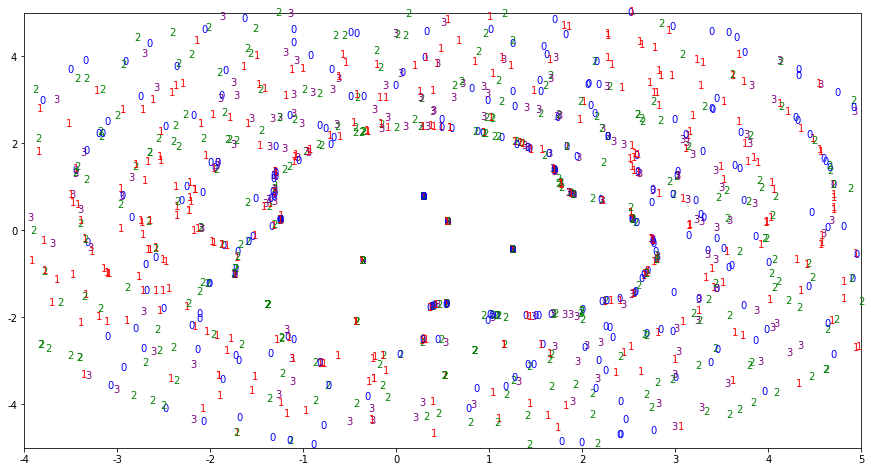

In [65]:
tsne_graph(X_train_tsne, y_train, (-4, 5, -5, 5))

In [66]:
tsne = TSNE(n_components=2, init='random', random_state=7)
X_train_tsne = tsne.fit_transform(X_train_svd)
print(X_train_tsne.shape)

(2034, 2)


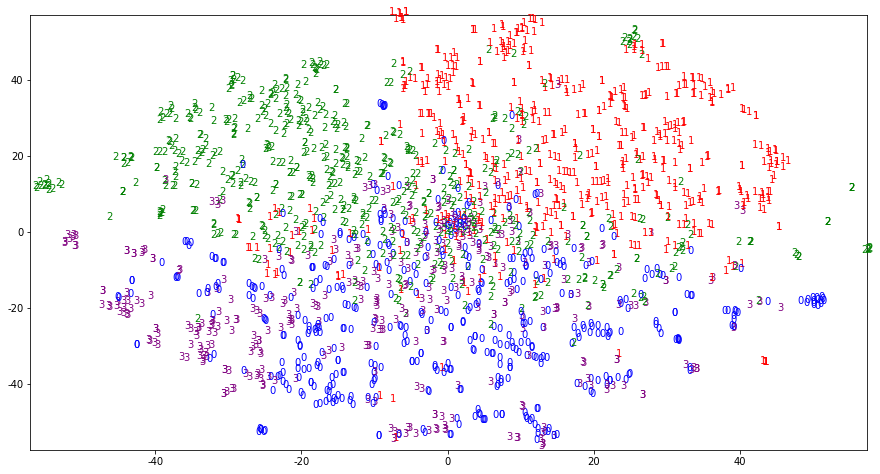

In [67]:
tsne_graph(X_train_tsne, y_train)